In [2]:
import numpy as np
import scipy.signal as ss
import soundfile as sf
import matplotlib.pyplot as plt

from models.nmf import EucNMF, KLNMF, ISNMF

In [4]:
plt.rcParams['figure.dpi'] = 200

fft_size, hop_size = 1024, 256

x, sr = sf.read("data/darhla_c1_gr1_0001.wav")

print(sr, x.shape)

_, _, spectrogram = ss.stft(x, nperseg=fft_size, noverlap=fft_size - hop_size)
X = np.abs(spectrogram) ** 2

n_basis = 2

np.random.seed(111)
nmf = ISNMF(n_basis=n_basis)

basis, activation = nmf(X, iteration=100)

for idx in range(n_basis):
    Z = basis[:, idx: idx + 1] * activation[idx: idx + 1, :]

    ratio = np.sqrt(Z / X)

    estimated_spectrogram = ratio * spectrogram
    _, estimated_signal = ss.istft(estimated_spectrogram, nperseg=fft_size, noverlap=fft_size - hop_size)
    estimated_signal = estimated_signal / np.abs(estimated_signal).max()
    sf.write('data/is' + str(idx) + '.wav', estimated_signal, sr)  

48000 (4265170,)


In [11]:
domain = 1
for idx in range(n_basis):
    estimated_spectrogram = (basis[:, idx: idx + 1] @ activation[idx: idx + 1, :])**(2 / domain)

    estimated_power = np.abs(estimated_spectrogram)**2
    estimated_power[estimated_power < 1e-12] = 1e-12
    print(estimated_power.shape)
#     log_spectrogram = 10 * np.log10(estimated_power)

#     plt.figure(figsize=(10, 8))
#     plt.pcolormesh(log_spectrogram, cmap='jet')
#     plt.show()

(513, 16662)
(513, 16662)


In [5]:
import librosa
import librosa.display

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\librosa\util\decorators.py:88: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  return f(*args, **kwargs)


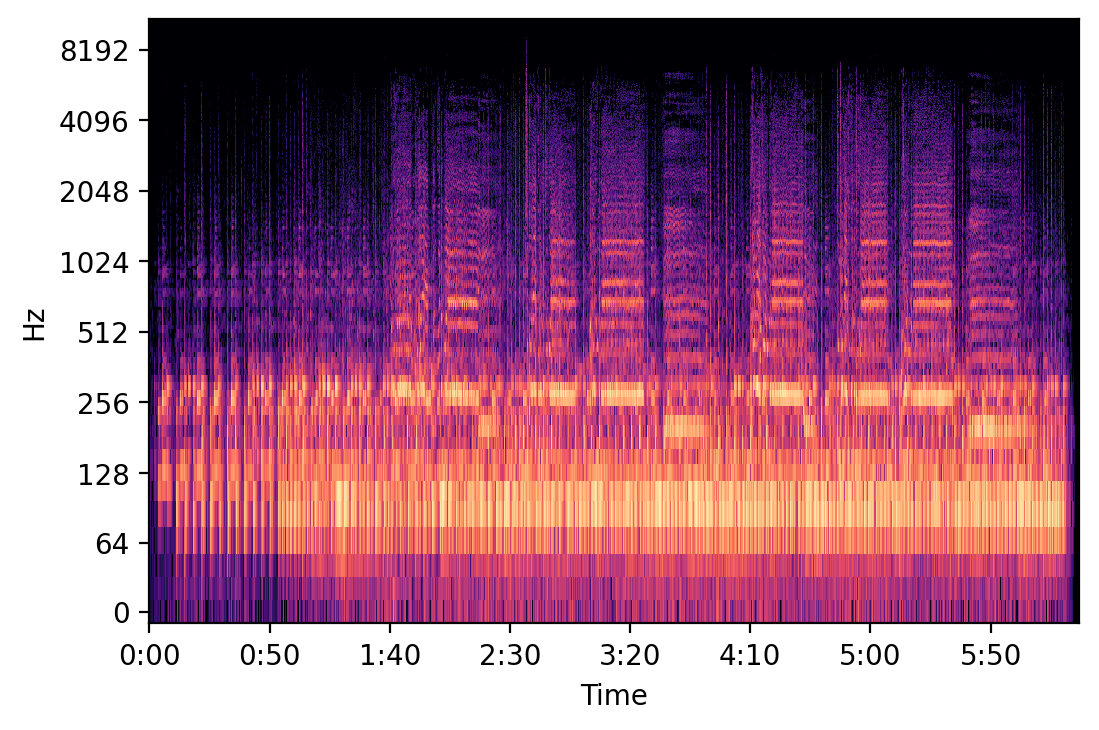

In [6]:
estimated_spectrogram = (basis[:, 0: 0 + 1] @ activation[0: 0 + 1, :])
librosa.display.specshow(librosa.amplitude_to_db(spectrogram, ref=np.max),
                               y_axis='log', x_axis='time')

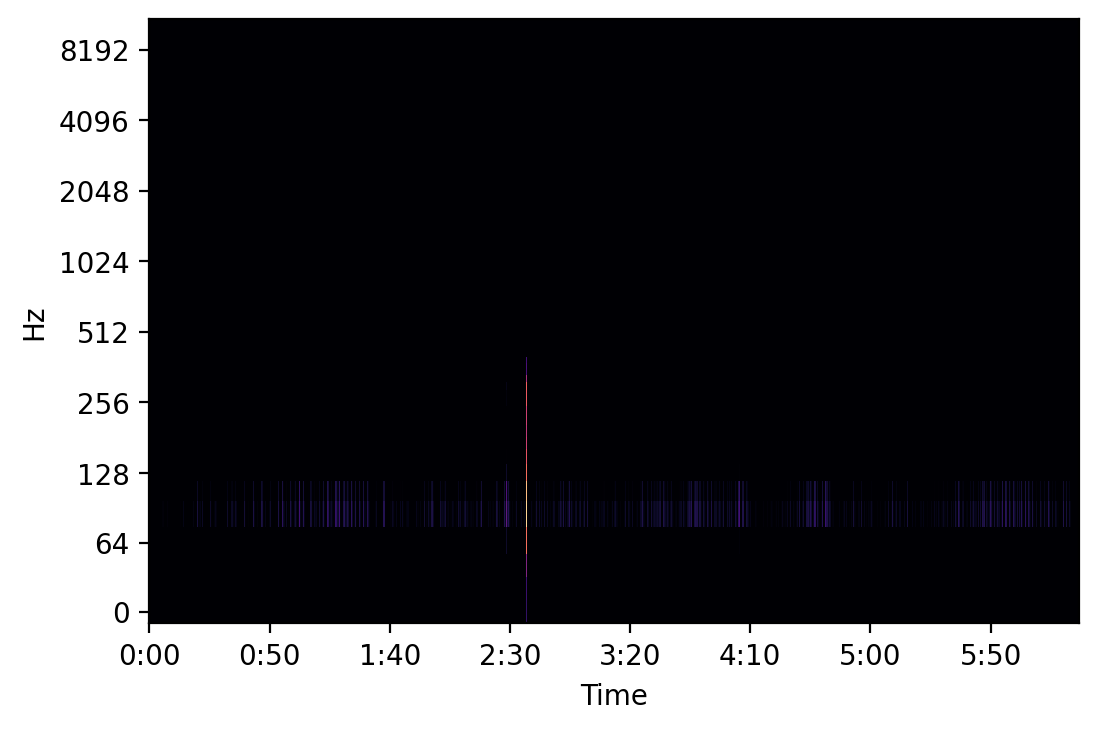

In [7]:
estimated_spectrogram = (basis[:, 0: 0 + 1] @ activation[0: 0 + 1, :])
librosa.display.specshow(librosa.amplitude_to_db(estimated_spectrogram,
                                                       ref=np.max),
                               y_axis='log', x_axis='time')

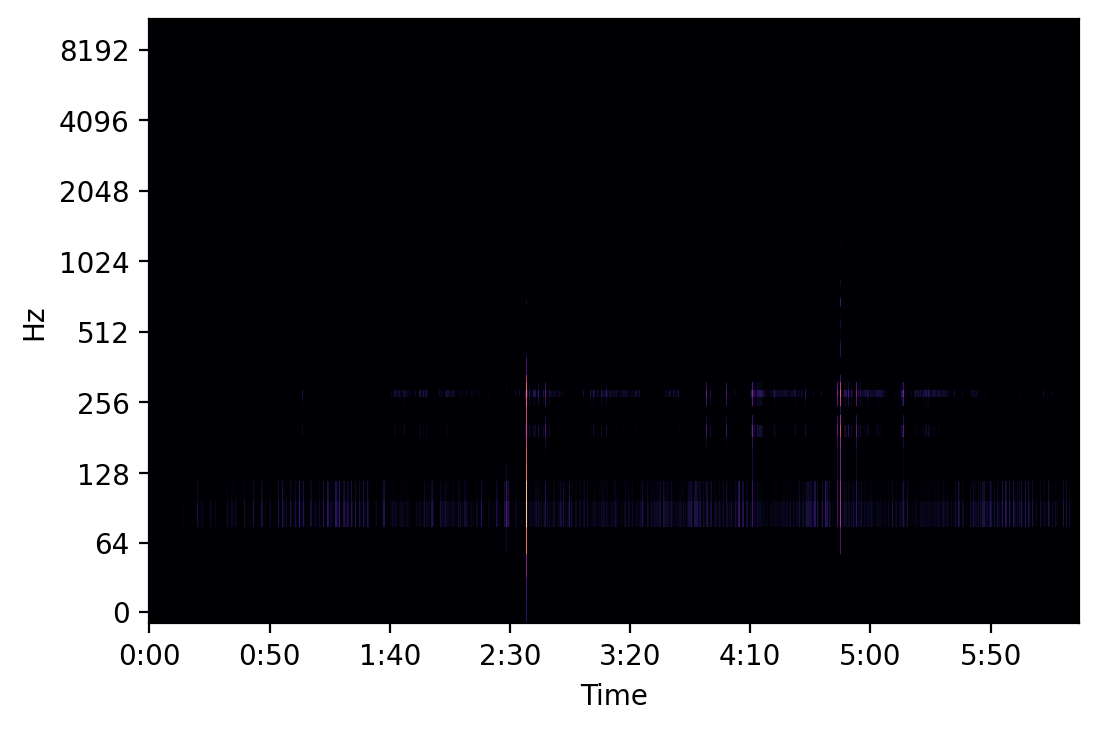

In [8]:
estimated_spectrogram = (basis[:, 0: 1 + 1] @ activation[0: 1 + 1, :])
librosa.display.specshow(librosa.amplitude_to_db(estimated_spectrogram,
                                                       ref=np.max),
                               y_axis='log', x_axis='time')

In [34]:
def specshow(
    audio_spectrogram,
    time_duration,
    maximum_frequency,
    xtick_step=1,
    ytick_step=1000,
):

    # Get the number of frequency channels and time frames
    number_frequencies, number_times = np.shape(audio_spectrogram)

    # Derive the number of time frames per second and the number of frequency channels per Hz
    time_resolution = number_times / time_duration
    frequency_resolution = number_frequencies / maximum_frequency

    # Prepare the tick locations and labels for the x-axis
    xtick_locations = np.arange(
        xtick_step * time_resolution,
        number_times,
        xtick_step * time_resolution,
    )
    xtick_labels = np.arange(xtick_step, time_duration, xtick_step).astype(int)

    # Prepare the tick locations and labels for the y-axis
    ytick_locations = np.arange(
        ytick_step * frequency_resolution,
        number_frequencies,
        ytick_step * frequency_resolution,
    )
    ytick_labels = np.arange(ytick_step, maximum_frequency, ytick_step).astype(int)

    # Display the spectrogram in dB, seconds, and Hz
    plt.imshow(
        audio_spectrogram, aspect="auto", cmap="jet", origin="lower"
    )
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")

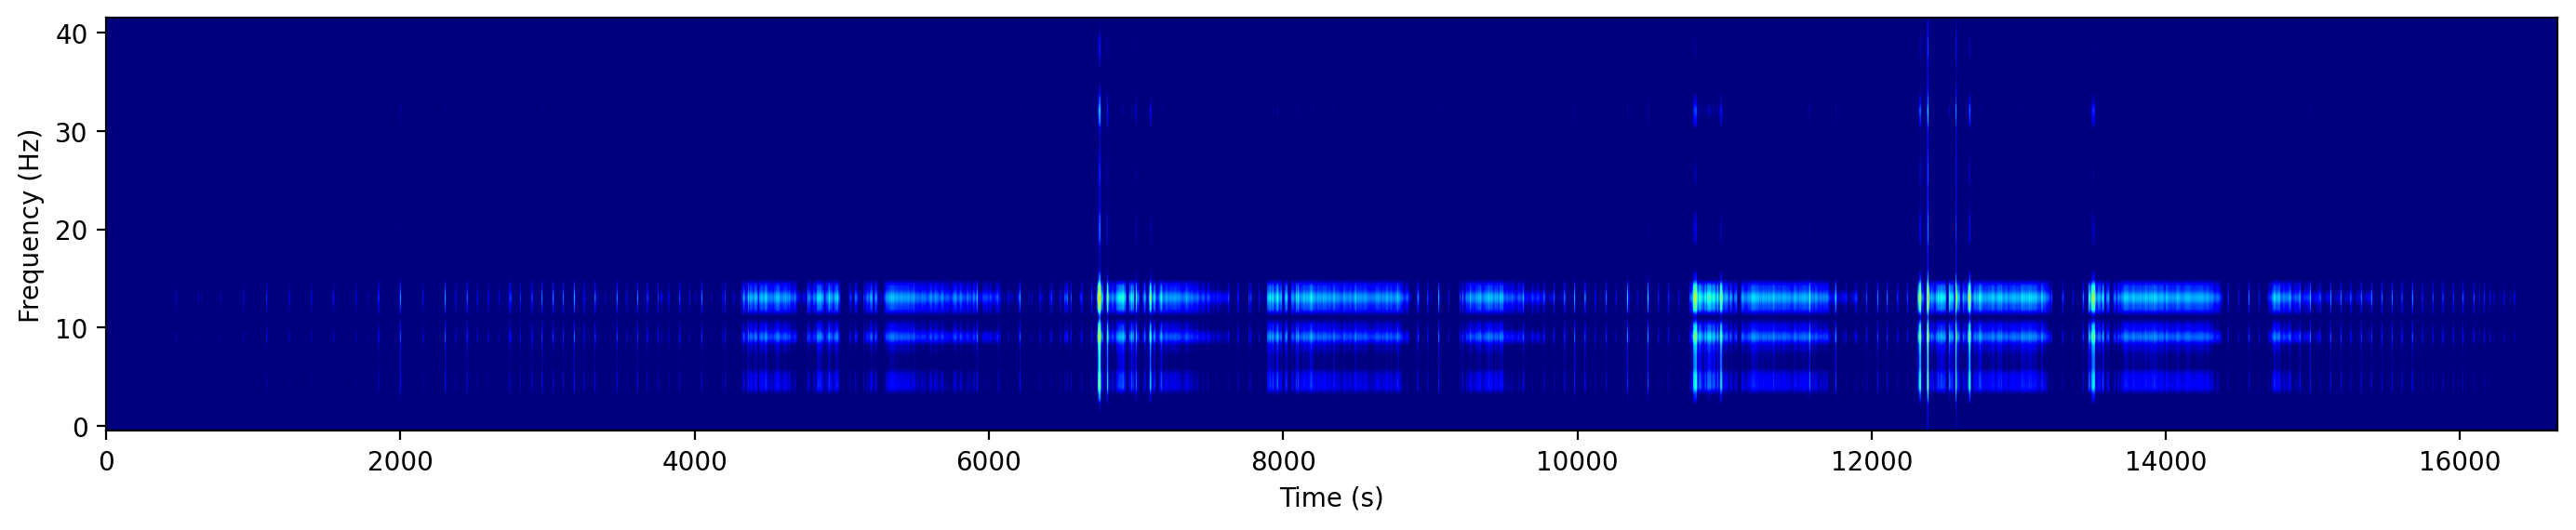

In [35]:
maximum_frequency = sr/8
time_duration = len(x)/sr

number_frequencies = int(1024 / 2) + 1
audio_spec = abs(spectrogram)
xtick_step = 1
ytick_step = 1000
plt.figure(figsize=(17, 10))
plt.subplot(3, 1, 1)
log_spectrogram = 20 * np.log10(estimated_power)
specshow(log_spectrogram[0:int(1024 / 24), :], time_duration, maximum_frequency)

(513, 16662)
(513, 16662)


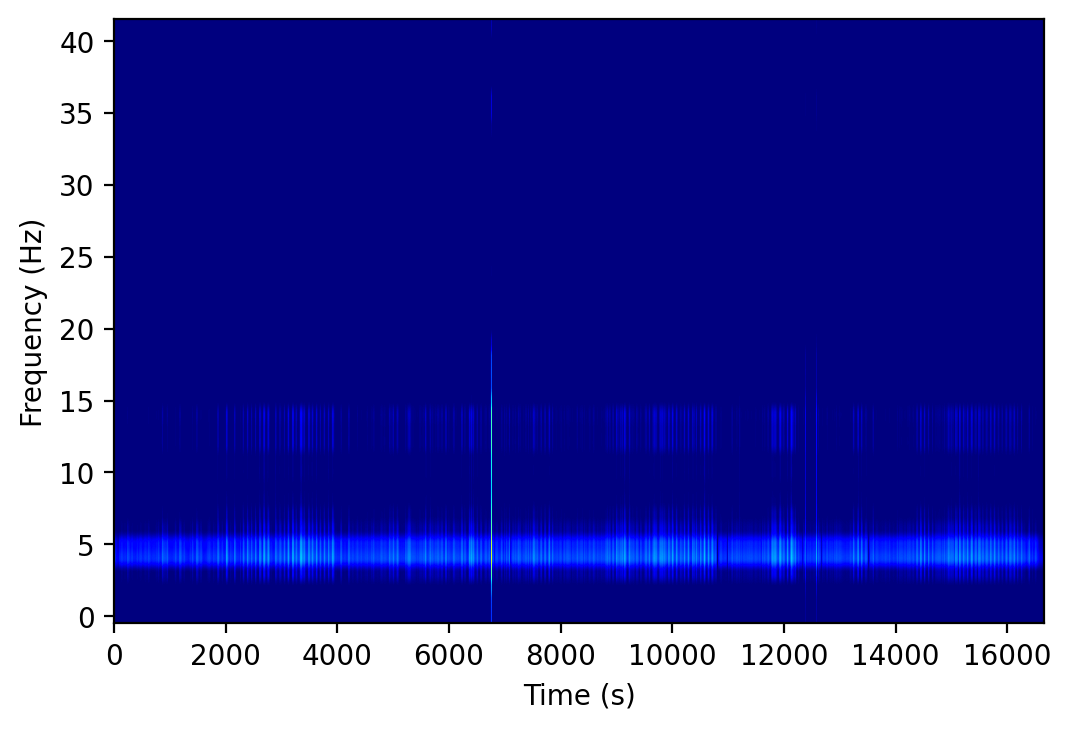

In [27]:
domain = 1
for idx in range(n_basis):
    estimated_spectrogram = (basis[:, idx: idx + 1] @ activation[idx: idx + 1, :])**(2 / domain)

    estimated_power = np.abs(estimated_spectrogram)**2
    estimated_power[estimated_power < 1e-12] = 1e-12
    print(estimated_power.shape)
    log_spectrogram = 20 * np.log10(estimated_power)
    if idx == 0:
        specshow(log_spectrogram[0:int(1024/24), :], time_duration, maximum_frequency)

In [ ]:
plt.subplot(3, 1, 1)
for idx in range(n_basis):
    Z = basis[:, idx: idx + 1] * activation[idx: idx + 1, :]

    ratio = np.sqrt(Z / X)

    estimated_spectrogram = ratio * spectrogram
    audio_spec = abs(estimated_spectrogram)
    if idx==1:
        specshow(audio_spec[0:int(1024 / 8), :], time_duration, maximum_frequency)

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
estimated_spectrogram = (basis[:, 0: 1 + 1] @ activation[0: 1 + 1, :])
img = librosa.display.specshow(librosa.amplitude_to_db(estimated_spectrogram,
                                                       ref=np.max),
                               y_axis='log', x_axis='time', ax=ax)
ax.set_title('Power spectrogram')
fig.colorbar(img, ax=ax, format="%+2.0f dB")

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
estimated_spectrogram = (basis[:, 0: 0 + 1] @ activation[0: 0 + 1, :])
img = librosa.display.specshow(librosa.amplitude_to_db(estimated_spectrogram,
                                                       ref=np.max),
                               y_axis='log', x_axis='time', ax=ax)
ax.set_title('Power spectrogram')
fig.colorbar(img, ax=ax, format="%+2.0f dB")

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
estimated_spectrogram = np.abs((basis[:, 0: 0 + 1] @ activation[0: 0 + 1, :]))
img = librosa.display.specshow(librosa.amplitude_to_db(estimated_spectrogram,
                                                       ref=np.max),
                               y_axis='log', x_axis='time', ax=ax)
ax.set_title('Power spectrogram')
fig.colorbar(img, ax=ax, format="%+2.0f dB")